In [17]:
import numpy as np
import itertools
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-white')

In [18]:
sound = './ESC-50-master/meta/esc50.csv'


df = pd.read_csv(sound)
df.head()

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


In [19]:
audio = []
target = []

for index, row in df.iterrows():
    audio_file = "ESC-50-master/audio/" + row['filename']
    y, sr = librosa.load(audio_file, sr=None)
    audio.append(y)
    target.append(row['target'])

print(audio)

[array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([-0.01184082, -0.10336304, -0.14141846, ...,  0.06985474,
        0.04049683,  0.00274658], dtype=float32), array([-0.00695801, -0.01251221, -0.01126099, ...,  0.215271  ,
       -0.00875854, -0.28903198], dtype=float32), array([0.53897095, 0.39627075, 0.26739502, ..., 0.09729004, 0.11227417,
       0.07983398], dtype=float32), array([-0.00036621, -0.0007019 , -0.00079346, ...,  0.00317383,
        0.00222778,  0.00158691], dtype=float32), array([-9.4604492e-04, -6.7138672e-04, -6.1035156e-05, ...,
       -2.1362305e-03, -2.6245117e-03, -3.1738281e-03], dtype=float32), array([0.00012207, 0.00018311, 0.00012207, ..., 0.        , 0.        ,
       0.        ], dtype=float32), array([0.00170898, 0.00177002, 0.00177002, ..., 0.00088501, 0.00021362,
       0.        ], dtype=float32), array([-0.44656372, -0.4701233 , -0.4803772 , ..., -0.06384277,
       -0.05136108, -0.04431152], dtype=float32), array([3.0517578e-05, 0.0000000e+0

In [20]:
print(target)

[0, 14, 36, 36, 19, 19, 30, 34, 9, 30, 30, 22, 22, 22, 0, 22, 19, 48, 48, 48, 48, 22, 22, 22, 41, 47, 31, 17, 45, 8, 15, 15, 15, 46, 46, 37, 32, 16, 37, 25, 25, 25, 25, 25, 25, 4, 4, 48, 48, 3, 15, 27, 27, 43, 12, 40, 40, 40, 40, 40, 40, 29, 10, 12, 7, 12, 12, 12, 26, 4, 6, 6, 40, 40, 44, 44, 23, 31, 20, 4, 4, 4, 49, 43, 24, 24, 7, 8, 8, 36, 36, 36, 41, 41, 41, 39, 3, 28, 18, 2, 2, 2, 2, 2, 20, 20, 20, 10, 46, 35, 38, 38, 25, 20, 20, 46, 44, 15, 15, 19, 19, 49, 35, 35, 43, 43, 19, 19, 19, 47, 43, 48, 48, 2, 2, 2, 21, 43, 43, 30, 10, 1, 35, 35, 28, 28, 1, 18, 11, 11, 43, 16, 10, 21, 26, 26, 18, 0, 0, 23, 23, 23, 24, 6, 6, 42, 42, 21, 4, 4, 0, 35, 35, 29, 26, 5, 5, 1, 1, 14, 14, 37, 38, 26, 26, 23, 23, 23, 23, 47, 29, 14, 14, 9, 9, 11, 11, 1, 28, 46, 28, 1, 28, 34, 12, 38, 1, 11, 34, 47, 47, 47, 47, 1, 27, 31, 14, 12, 18, 49, 36, 7, 7, 41, 41, 21, 21, 16, 16, 5, 5, 5, 28, 46, 38, 35, 8, 8, 10, 44, 44, 15, 17, 44, 17, 16, 16, 16, 25, 18, 17, 17, 33, 33, 33, 33, 33, 33, 33, 33, 24, 30, 24,

In [21]:
import numpy as np

audio_np = np.array(audio, np.float32)
target_np = np.array(target, np.int16)

print(audio_np.shape, target_np.shape)

(2000, 220500) (2000,)


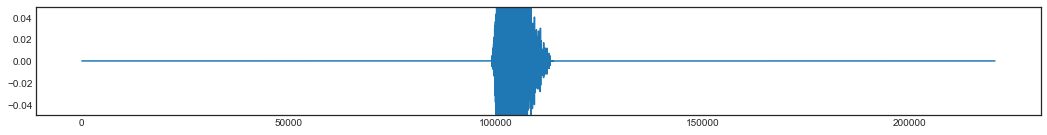

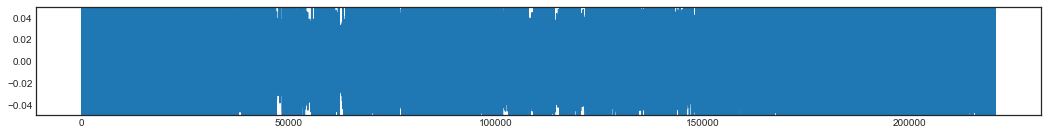

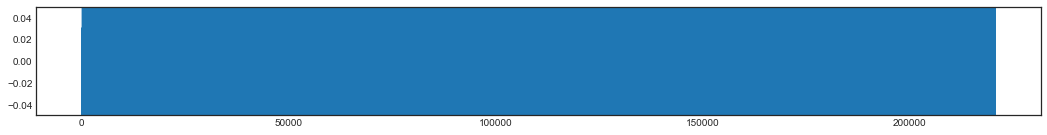

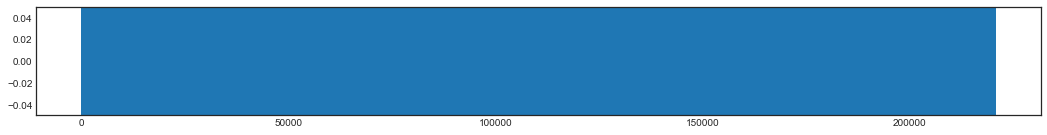

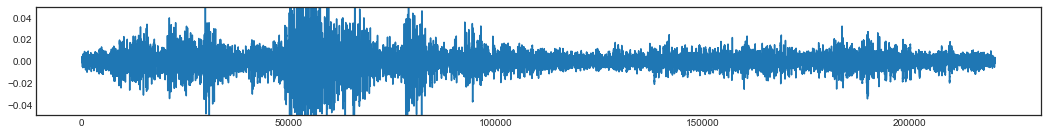

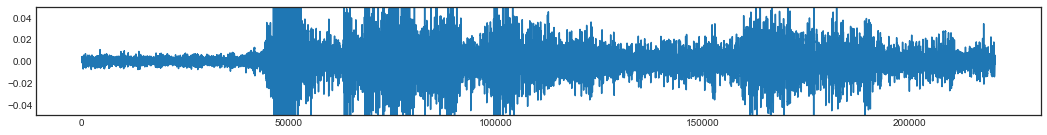

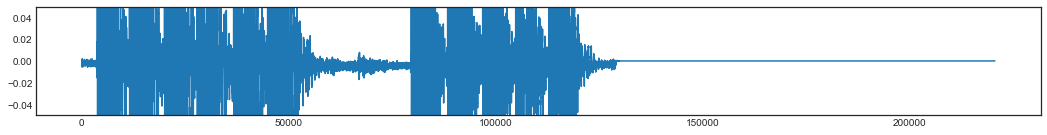

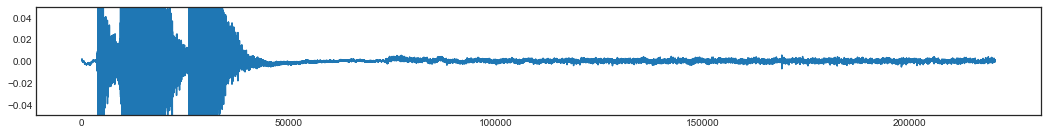

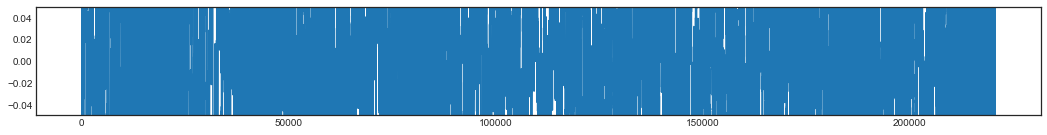

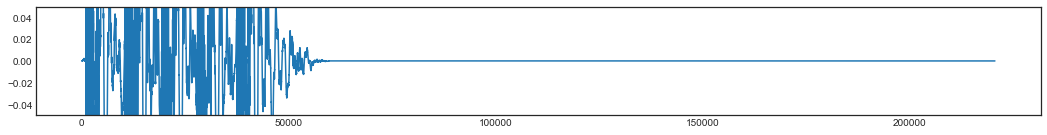

In [22]:
for idx in range(0, 10):
    plt.figure(figsize=(18,2))
    plt.plot(audio_np[idx])
    plt.ylim((-0.05, 0.05))
    plt.show()

In [23]:
print(target_np[0])
ipd.Audio(audio_np[0], rate=sr)

0


In [24]:
print(target_np[1])
ipd.Audio(audio_np[1], rate=sr)

14


In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(audio_np)

MinMaxScaler()

In [26]:
audio_cqt = []
for y in audio:
  ret = librosa.cqt(y, sr, hop_length=1024, n_bins=24*7, bins_per_octave=24)
  ret = np.abs(ret)
  audio_cqt.append(ret)

C:\Users\jcc96\AppData\Local\Temp/ipykernel_21672/2563633928.py:3: FutureWarning: Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ret = librosa.cqt(y, sr, hop_length=1024, n_bins=24*7, bins_per_octave=24)


c:\Users\jcc96\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  return f(*args, **kwargs)


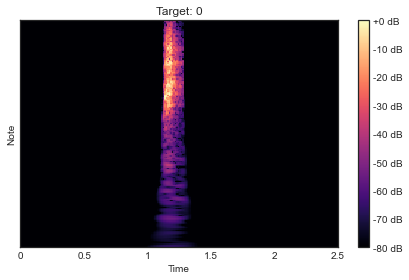

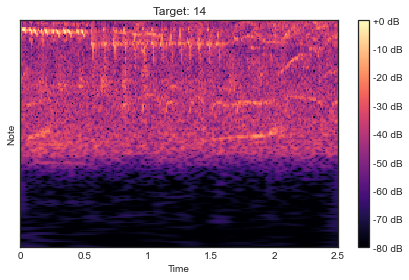

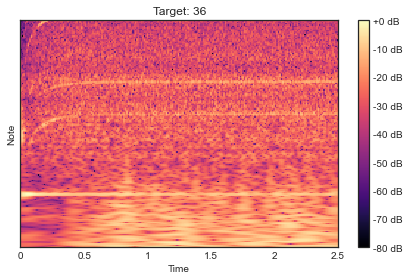

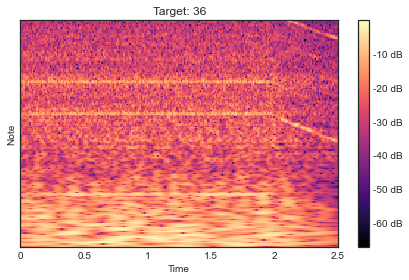

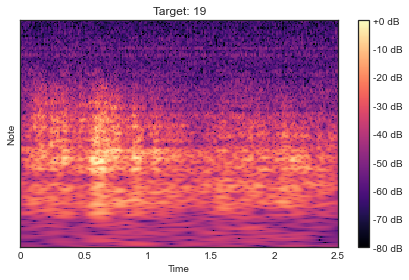

In [27]:
for i in range(0, 5):
    amp_db = librosa.amplitude_to_db(np.abs(audio_cqt[i]), ref=np.max)
    librosa.display.specshow(amp_db, sr=sr, x_axis='time', y_axis='cqt_note')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Target: {}'.format(target[i]))
    plt.tight_layout()
    plt.show()

In [28]:
cqt_np = np.array(audio_cqt, np.float32)
target_np = np.array(target, np.int16)

print(cqt_np.shape, target_np.shape)

(2000, 168, 216) (2000,)


In [31]:
cqt_np = cqt_np.reshape(2000, 168 * 216)

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(cqt_np)

MinMaxScaler()

In [33]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(cqt_np, inst_np, test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(1600, 36288)
(400, 36288)
(1600,)
(400,)


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression()
LR.fit(train_x, train_y)
pred = LR.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.2575


c:\Users\jcc96\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
from sklearn import svm

SVM = svm.SVC(kernel='linear')
SVM.fit(train_x, train_y)
pred =SVM.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.26


In [36]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(train_x, train_y)
pred = DT.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.1175


In [ ]:
### 결론 sr 구간이 일정하지 않아서 그런거 같다. 전처리를 좀 해줘야 할듯